# Linking to parent datasets

When performing a measurement in QCoDeS, it is possible to annotate the outcome (the dataset) of that measurement as having one or more parent datasets. This is done by adding a link to each parent dataset. This notebook covers the mechanisms to do that by going through a few practical examples.

In [7]:
import numpy as np
import scipy.optimize as opt

from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import load_by_id

## Example 1: Measuring and then fitting

Say we measure some raw data and subsequently do a curve fit to those data. We'd like to save the fit as a separate dataset that has a link to the dataset of the original data. This is achieved in two steps.

### Step 1: measure raw data

In [2]:
meas = Measurement()
meas.register_custom_parameter(name='time',
                               label='Time', unit='s',
                               paramtype='array')
meas.register_custom_parameter(name='signal',
                               label='Signal', unit='V',
                               paramtype='array',
                               setpoints=['time'])

N = 500

with meas.run() as datasaver:
    time_data = np.linspace(0, 1, N)
    signal_data = np.sin(2*np.pi*time_data) + 0.25*np.random.randn(N)
    
    datasaver.add_result(('time', time_data), ('signal', signal_data))
raw_run_id = datasaver.run_id

Starting experimental run with id: 63


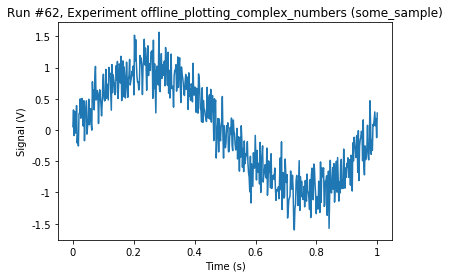

In [11]:
cbs, axs = plot_by_id(raw_run_id)

### Step 2: Set up a fit "measurement"

We now load the raw data dataset, set up a new measurement for the fit, register the raw data as a parent and save a fit.

In [8]:
raw_data = load_by_id(raw_run_id)

meas = Measurement()
meas.register_custom_parameter('fitax',
                               label='Fit axis', unit='t',
                               paramtype='array')
meas.register_custom_parameter('fit_curve',
                               label='Fitted curve', unit='V',
                               paramtype='array',
                               setpoints=['fitax'])
meas.register_parent(parent=raw_data, link_type="curve fit")

Now we supply a fit function for the data. A sine is probably a good bet.

In [6]:
def fit_func(x, a, b):
    return a*np.sin(2*np.pi*x)+b

As we now run the measurement, the parent datasets become available via the datasaver. The datasets appear in the order they were registered.

In [11]:
with meas.run() as datasaver:
    raw = datasaver.parent_datasets[0]
    xdata = raw.get_parameter_data()['signal']['time']
    ydata = raw.get_parameter_data()['signal']['signal']
    
    # do curve fit, save stuff

Starting experimental run with id: 64
